# Guns Seized

Two of the most serious crimes are murder and homicide. In a Harvard study, it was found that there is a direct correlation between the number of guns in a community and the number of homicides (https://www.hsph.harvard.edu/hicrc/firearms-research/guns-and-death/). **Commiting a homicide is a capital crime!** 

Having guns seized in a community means that there are fewer overall guns, which decreases the chance of law enforcement being occupied with another crime, meaning you are more likely to be caught.  It also means that police/law enforcement is more active, which is terrible in our case. By looking at the number of guns seized and ranking it by the least number seized, we can see which community will be the best to get away with a capital crime!

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

#Gets access to gun seizure data
gunData = pd.read_csv("gunSeizureAllData.csv",sep=",")

#Stores Data about about the number of guns found, the community, and the neighborhood
guns = gunData["total_count"].tolist()
neighborhoods = gunData["neighborhood"].tolist()

# Creates a dictionary to store the number of gun seizures by neighborhood
neighByGuns = {}

# Combinds each of the individual entries for neighborhoods with multiple seizures
for gun, neigh in zip(guns, neighborhoods):
    if str(neigh) in neighByGuns:
        if(gun > 1):
            gun = gun*3
        neighByGuns[neigh] += gun
    else:
        neighByGuns[neigh] = gun

# Prints out the result
print(neighByGuns)

{'Mount Oliver Borough': 13, 'Sheraden': 171, 'Terrace Village': 63, 'Brighton Heights': 319, nan: 1, 'Westwood': 10, 'East Liberty': 320, 'Upper Lawrenceville': 42, 'Marshall-Shadeland': 270, 'Beechview': 199, 'East Hills': 229, 'Arlington': 76, 'Arlington Heights': 18, 'Mount Washington': 126, 'South Side Flats': 304, 'Hazelwood': 238, 'Homewood South': 591, 'Greenfield': 35, 'Bloomfield': 112, 'Beltzhoover': 54, 'Homewood North': 253, 'Upper Hill': 65, 'Perry South': 218, 'Lincoln-Lemington-Belmar': 228, 'Bedford Dwellings': 129, 'Homewood West': 87, 'Carrick': 256, 'Central Northside': 145, 'Chateau': 40, 'Fineview': 117, 'Chartiers City': 4, 'Larimer': 194, 'Polish Hill': 10, 'South Shore': 17, 'Highland Park': 74, 'Knoxville': 185, 'Lower Lawrenceville': 31, 'Allentown': 165, 'Spring Hill-City View': 121, 'Garfield': 153, 'Bluff': 78, 'Overbrook': 43, 'South Side Slopes': 50, 'Central Business District': 171, 'Banksville': 10, 'Perry North': 80, 'Friendship': 11, 'Crawford-Robert

In [6]:
# Stores the values in lists
gunsPerNeigh = list(neighByGuns.values())
neigh = list(neighByGuns.keys())

# Creating a data frame with the points value
dataFrame = pd.DataFrame(list(zip(neigh, gunsPerNeigh)), columns=["Neighborhoods", "Number of Guns Seized"])
dataFrame["Points"] = dataFrame["Number of Guns Seized"]*2

# Getting rid of invalid values
noBadDF = dataFrame.dropna()

# Sorting based off the best place (least guns seized) to live
sortDataFrameLH = noBadDF.sort_values(by=["Points"], ascending=True)

sortDataFrameLH.head()

,Neighborhoods,Number of Guns Seized,Points
88,Swisshelm Park,3,6
64,Summer Hill,3,6
84,Mt. Oliver,4,8
79,Oakwood,4,8
76,Regent Square,4,8


In [7]:
# Sorting based off the worst place (most guns seized) to live
sortDataFrameHL = noBadDF.sort_values(by=["Points"], ascending=False)
sortDataFrameHL["Neighborhoods"] = sortDataFrameHL["Neighborhoods"].str.lower()

sortDataFrameHL.head()

,Neighborhoods,Number of Guns Seized,Points
16,homewood south,591,1182
6,east liberty,320,640
3,brighton heights,319,638
14,south side flats,304,608
8,marshall-shadeland,270,540


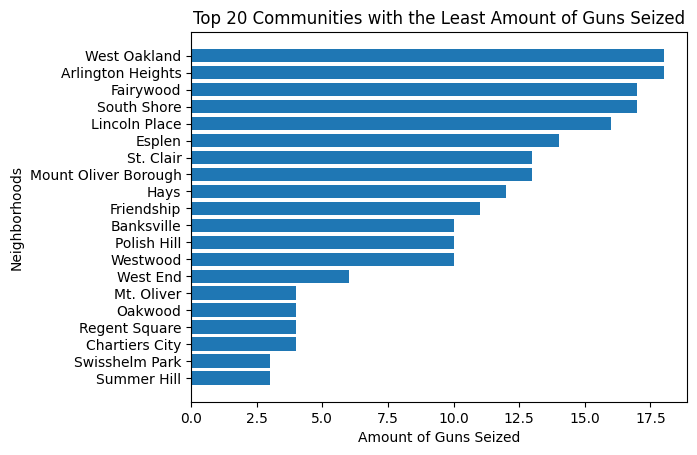

In [8]:
# Takes all of the values of the dictionary containing neighborhoods and the number of guns seized and sorts it in ascending order
sortedValues = dict(sorted(neighByGuns.items(), key=lambda item: item[1]))

# Taking the twenty neighborhoods with the least number of guns seized
leastNeigh = (list(sortedValues.values())[1:21])
leastGuns = (list(sortedValues.keys())[1:21])


plt.barh(leastGuns, leastNeigh)
plt.xlabel("Amount of Guns Seized")
plt.ylabel("Neighborhoods")
plt.title("Top 20 Communities with the Least Amount of Guns Seized")
plt.show()

# Conclusion - Gun Seizure

Summer Hill is the area with the least amount of guns seized. The point data (which is inversely correlated to the number of gun seizures) will be added to the final tally to create the list of best places to commit capital crime.